In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Concatenate, \
     MaxPool2D, GlobalAvgPool2D, Activation

In [ ]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Normalization
x_train = x_train / 255
x_test = x_test / 255
#As the pixel values range from 0 to 256, apart from 0 the range is #255. So dividing all the values by 255 will convert it to range #from 0 to 1
# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#Here we are taking 10 because we have 10 different digits ranging from 0-9.

# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.8095 - loss: 0.6625 - val_accuracy: 0.9673 - val_loss: 0.1153
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.9677 - loss: 0.1067 - val_accuracy: 0.9784 - val_loss: 0.0694
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9787 - loss: 0.0699 - val_accuracy: 0.9783 - val_loss: 0.0661
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.9839 - loss: 0.0501 - val_accuracy: 0.9837 - val_loss: 0.0522
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9870 - loss: 0.0404 - val_accuracy: 0.9862 - val_loss: 0.0450
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.9884 - loss: 0.0357 - val_accuracy: 0.9873 - val_loss: 0.0426
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9879 - val_loss: 0.0375
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9920 - loss: 0.0238 - 

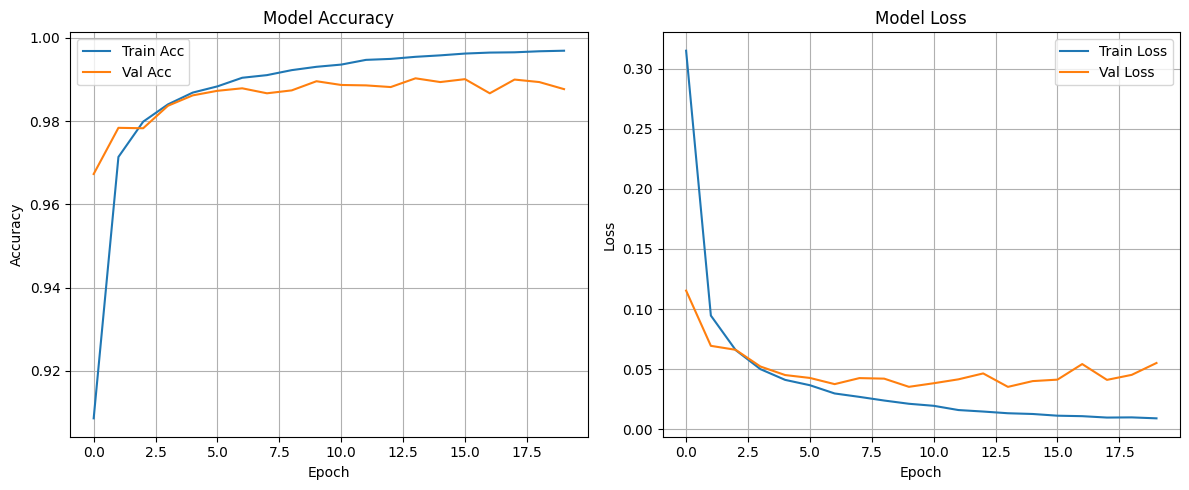

In [ ]:
import matplotlib.pyplot as plt

# Create a side-by-side plot
plt.figure(figsize=(12, 5))

# 📊 Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 📉 Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

# Fire module with BatchNorm
def fire_module(x, squeeze_filters, expand1x1_filters, expand3x3_filters):
    x = layers.Conv2D(squeeze_filters, (1,1), activation='relu', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    expand1x1 = layers.Conv2D(expand1x1_filters, (1,1), activation='relu', kernel_initializer='he_normal')(x)
    expand3x3 = layers.Conv2D(expand3x3_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
    return layers.concatenate([expand1x1, expand3x3], axis=-1)

# Full SqueezeNet model
def SqueezeNet(input_shape=(32, 32, 3), num_classes=10):
    input_img = layers.Input(shape=input_shape)
    x = layers.Conv2D(96, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = fire_module(x, 16, 64, 64)
    x = fire_module(x, 16, 64, 64)
    x = fire_module(x, 32, 128, 128)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = fire_module(x, 32, 128, 128)
    x = fire_module(x, 48, 192, 192)
    x = fire_module(x, 48, 192, 192)
    x = fire_module(x, 64, 256, 256)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = fire_module(x, 64, 256, 256)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(num_classes, (1,1), kernel_initializer='he_normal')(x)
    x = layers.GlobalAveragePooling2D()(x)
    output = layers.Activation('softmax')(x)

    model = models.Model(inputs=input_img, outputs=output)
    return model

# Load & preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [Errno 111] Connection refused

In [ ]:
# Compile model
model = SqueezeNet()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate decay function
def lr_schedule(epoch):
    return 0.001 * (0.5 ** (epoch // 10))

# Train
model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
          callbacks=[LearningRateScheduler(lr_schedule)],
          verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.3318 - loss: 1.7988 - val_accuracy: 0.3506 - val_loss: 2.1111 - learning_rate: 0.0010
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.5452 - loss: 1.2558 - val_accuracy: 0.5530 - val_loss: 1.3135 - learning_rate: 0.0010
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.6305 - loss: 1.0273 - val_accuracy: 0.5792 - val_loss: 1.2750 - learning_rate: 0.0010
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 552s 1s/step - accuracy: 0.6873 - loss: 0.8715 - val_accuracy: 0.5718 - val_loss: 1.2355 - learning_rate: 0.0010
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.7421 - loss: 0.7318 - val_accuracy: 0.6696 - val_loss: 0.9628 - learning_rate: 0.0010
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - accuracy: 0.7801 - loss: 0.6251 - val_accuracy: 0.6766 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.8089 - loss: 0.

KeyboardInterrupt: 

In [ ]:
model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Concatenate, \
     MaxPool2D, GlobalAvgPool2D, Activation


def fire_block(x, squeeze_filters, expand_filters):
    squeezed = Conv2D(filters=squeeze_filters,
                      kernel_size=1,
                      activation='relu')(x)
    expanded_1x1 = Conv2D(filters=expand_filters,
                        kernel_size=1,
                        activation='relu')(squeezed)
    expanded_3x3 = Conv2D(filters=expand_filters,
                        kernel_size=3,
                        padding='same',
                        activation='relu')(squeezed)

    output = Concatenate()([expanded_1x1, expanded_3x3])
    return output


# input = Input([224, 224, 3])
input = Input([32, 32, 3])

x = Conv2D(96, 7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(3, strides=2, padding='same')(x)


x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=64, expand_filters=256)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = fire_block(x, squeeze_filters=64, expand_filters=256)


x = Conv2D(filters=10, kernel_size=1)(x)
x = GlobalAvgPool2D()(x)

output = Activation('softmax')(x)

from tensorflow.keras import Model
model = Model(input, output)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate decay function
# def lr_schedule(epoch):
#     return 0.001 * (0.5 ** (epoch // 10))

# Train
model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
          # callbacks=[LearningRateScheduler(lr_schedule)],
          verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 188s 499ms/step - accuracy: 0.0992 - loss: 2.3029 - val_accuracy: 0.0958 - val_loss: 2.3027
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 196s 484ms/step - accuracy: 0.0993 - loss: 2.3026 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 198s 473ms/step - accuracy: 0.0964 - loss: 2.3026 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 206s 485ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.0958 - val_loss: 2.3028
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 197s 470ms/step - accuracy: 0.1018 - loss: 2.3027 - val_accuracy: 0.0958 - val_loss: 2.3027
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 200s 466ms/step - accuracy: 0.0985 - loss: 2.3026 - val_accuracy: 0.1024 - val_loss: 2.3027
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 205s 474ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.0958 - val_loss: 2.3028
Epoch 8/20
111/352 ━━━━━━━━━━━━━━━━━━━━ 1:57 487ms/step - accuracy: 0.0982 -

KeyboardInterrupt: 

Another trial

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the Fire module
def fire_module(x, fire_id, squeeze=16, expand=64):
    squeeze_name = f'fire{fire_id}_squeeze1x1'
    expand1x1_name = f'fire{fire_id}_expand1x1'
    expand3x3_name = f'fire{fire_id}_expand3x3'
    relu_name = f'fire{fire_id}_relu'

    x = layers.Conv2D(squeeze, (1,1), padding='valid', name=squeeze_name)(x)
    x = layers.Activation('relu', name=f'{relu_name}_squeeze1x1')(x)

    expand1x1 = layers.Conv2D(expand, (1,1), padding='valid', name=expand1x1_name)(x)
    expand1x1 = layers.Activation('relu', name=f'{relu_name}_expand1x1')(expand1x1)

    expand3x3 = layers.Conv2D(expand, (3,3), padding='same', name=expand3x3_name)(x)
    expand3x3 = layers.Activation('relu', name=f'{relu_name}_expand3x3')(expand3x3)

    x = layers.concatenate([expand1x1, expand3x3], axis=3, name=f'fire{fire_id}_concat')
    return x


# Build the SqueezeNet model
def SqueezeNet(input_shape=(32,32,3), classes=10):
    input_img = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3,3), strides=(2,2), padding='valid', name='conv1')(input_img)
    x = layers.Activation('relu', name='relu_conv1')(x)
    x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), name='pool1')(x)

    x = fire_module(x, fire_id=2, squeeze=16, expand=64)
    x = fire_module(x, fire_id=3, squeeze=16, expand=64)

    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    x = layers.Dropout(0.5, name='drop9')(x)

    x = layers.Conv2D(classes, (1,1), padding='valid', name='conv10')(x)
    x = layers.Activation('relu', name='relu_conv10')(x)
    x = layers.GlobalAveragePooling2D()(x)
    output = layers.Activation('softmax', name='softmax')(x)

    model = models.Model(inputs=input_img, outputs=output, name='squeezenet')
    return model


In [5]:
# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Instantiate the model
model = SqueezeNet()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define learning rate schedule
def lr_schedule(epoch):
    return 0.001 * (0.5 ** (epoch // 10))

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=80,
                    validation_split=0.1,
                    callbacks=[LearningRateScheduler(lr_schedule)],
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")


Epoch 1/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.1789 - loss: 2.1402 - val_accuracy: 0.3102 - val_loss: 1.7638 - learning_rate: 0.0010
Epoch 2/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3361 - loss: 1.7272 - val_accuracy: 0.4252 - val_loss: 1.5408 - learning_rate: 0.0010
Epoch 3/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4192 - loss: 1.5629 - val_accuracy: 0.4590 - val_loss: 1.4879 - learning_rate: 0.0010
Epoch 4/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4554 - loss: 1.4593 - val_accuracy: 0.4808 - val_loss: 1.4286 - learning_rate: 0.0010
Epoch 5/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4927 - loss: 1.3781 - val_accuracy: 0.5240 - val_loss: 1.3028 - learning_rate: 0.0010
Epoch 6/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5246 - loss: 1.2973 - val_accuracy: 0.5308 - val_loss: 1.3017 - learning_rate: 0.0010
Epoch 7/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5444 - loss: 1.2497 

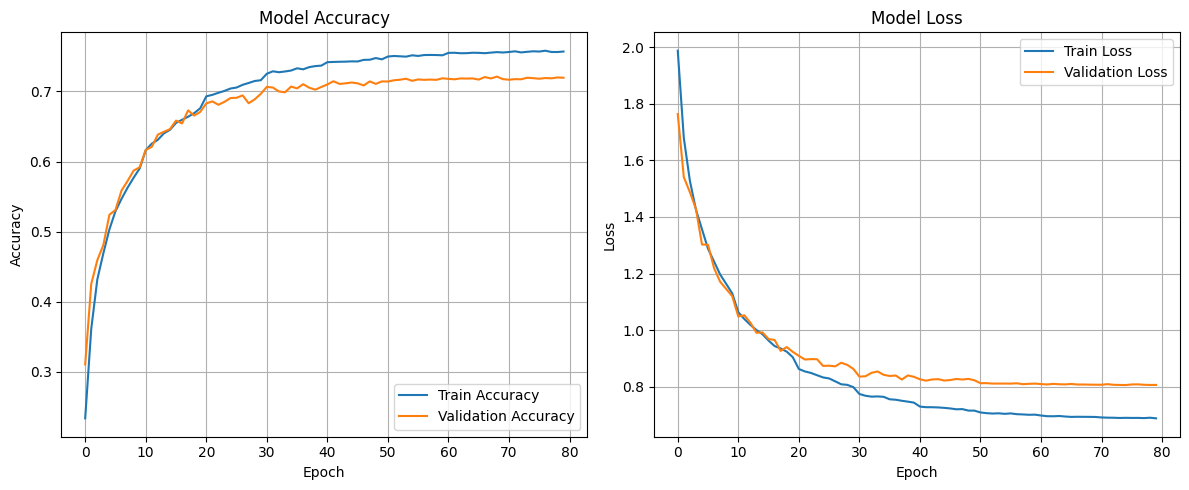

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()